In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input,RandomFlip, RandomRotation, RandomZoom,Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical



In [24]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [25]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [26]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])


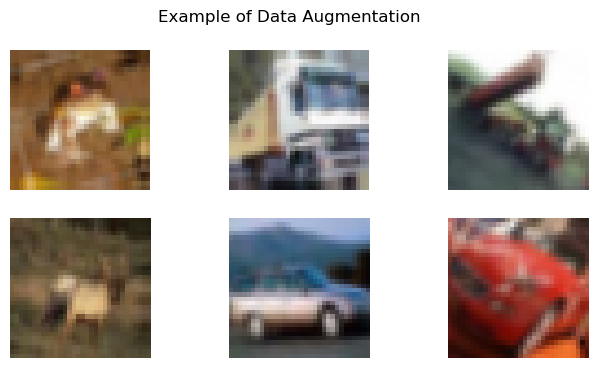

In [27]:
plt.figure(figsize=(8, 4))
for i in range(6):
    augmented = data_augmentation(tf.expand_dims(x_train[i], 0))
    plt.subplot(2, 3, i + 1)
    plt.imshow(augmented[0])
    plt.axis('off')
plt.suptitle("Example of Data Augmentation")
plt.show()

In [28]:
model=Sequential([
    data_augmentation,
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\adity\.conda\envs\genai\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary() 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (1, 32, 32, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (1, 30, 30, 32)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (1, 15, 15, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (1, 13, 13, 64)        │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (1, 6, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (1, 2304)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 64)                │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (1, 10)                │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [31]:
history=model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=64
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.3101 - loss: 1.9002 - val_accuracy: 0.4750 - val_loss: 1.4920
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.4796 - loss: 1.4496 - val_accuracy: 0.5518 - val_loss: 1.2613
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 0.5306 - loss: 1.3233 - val_accuracy: 0.5435 - val_loss: 1.3133
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5582 - loss: 1.2478 - val_accuracy: 0.5899 - val_loss: 1.1874
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.5767 - loss: 1.1985 - val_accuracy: 0.5625 - val_loss: 1.2821
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5887 - loss: 1.1685 - val_accuracy: 0.6261 - val_loss: 1.0725
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6019 - loss: 1.1330 - val_accuracy: 0.6298 - val_loss: 1.0760
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6125 - loss: 1.1124 - 

In [32]:
mlp_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

mlp_model.summary()


c:\Users\adity\.conda\envs\genai\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:

history_mlp = mlp_model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=64
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.2788 - loss: 2.0424 - val_accuracy: 0.3840 - val_loss: 1.7172
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.3937 - loss: 1.6993 - val_accuracy: 0.4100 - val_loss: 1.6785
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4242 - loss: 1.6048 - val_accuracy: 0.4496 - val_loss: 1.5376
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4547 - loss: 1.5297 - val_accuracy: 0.4375 - val_loss: 1.5784
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4710 - loss: 1.4829 - val_accuracy: 0.4563 - val_loss: 1.5232
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4818 - loss: 1.4554 - val_accuracy: 0.4708 - val_loss: 1.4761
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4927 - loss: 1.4188 - val_accuracy: 0.4806 - val_loss: 1.4686
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5008 - loss: 1.3918 - 

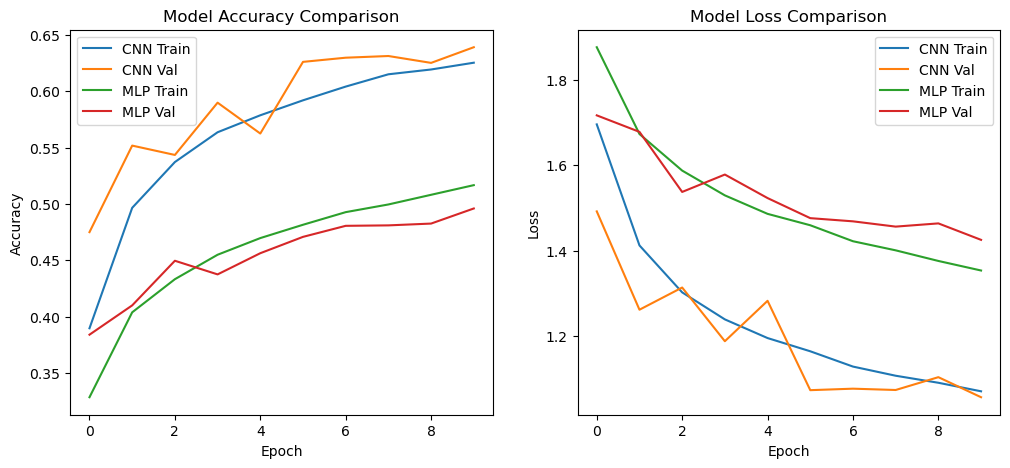

In [34]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='CNN Train')
plt.plot(history.history['val_accuracy'], label='CNN Val')
plt.plot(history_mlp.history['accuracy'], label='MLP Train')
plt.plot(history_mlp.history['val_accuracy'], label='MLP Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Train')
plt.plot(history.history['val_loss'], label='CNN Val')
plt.plot(history_mlp.history['loss'], label='MLP Train')
plt.plot(history_mlp.history['val_loss'], label='MLP Val')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [36]:
cnn_loss, cnn_acc = model.evaluate(x_test, y_test)
mlp_loss, mlp_acc = mlp_model.evaluate(x_test, y_test)

print(f"\nCNN Accuracy: {cnn_acc * 100:.2f}%")
print(f"MLP Accuracy: {mlp_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6371 - loss: 1.0547
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4949 - loss: 1.4199

CNN Accuracy: 63.91%
MLP Accuracy: 49.60%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


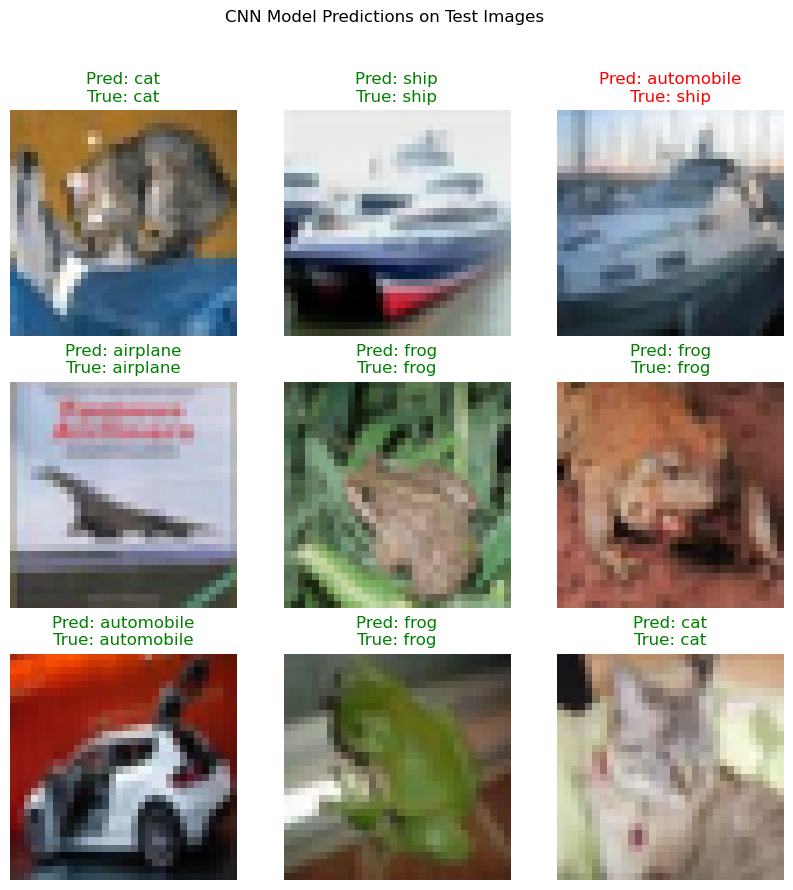

In [37]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model.predict(x_test)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i])
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = "green" if pred_label == true_label else "red"
    plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}", color=color)
    plt.axis('off')

plt.suptitle("CNN Model Predictions on Test Images")
plt.show()